In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
import matplotlib.image as mpimg
import import_ipynb
from clean_tests import df_tech, df_uk_tech


In [2]:
df_tech.head()

,equipment,model,manufacturer,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Bayraktar TB2,destroyed,destroyed by Bayraktar TB2,destroyed by Bayraktar TB2 and Harpoon AShM,sunk,total captured,total not captured
0,Tanks,T-62M,the Soviet Union,20,1.0,0.0,14.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,16.0,4.0
1,Tanks,T-62MV,the Soviet Union,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,Tanks,T-64A,the Soviet Union,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
3,Tanks,T-64BV,the Soviet Union,39,2.0,0.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,30.0,0.0,0.0,0.0,5.0,34.0
4,Tanks,T-72A,the Soviet Union,33,1.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,15.0,18.0


In [3]:
# Vamos a empezar de un modo mas ortodoxo: primero un describe
df_tech.describe(include=['object'])

,equipment,model,manufacturer
count,298,298,298
unique,25,298,7
top,Engineering Vehicles And Equipment,T-62M,Russia
freq,45,1,188


In [4]:
df_tech.describe()


,losses_total,abandoned,abandoned and destroyed,captured,captured and destroyed,captured and stripped,damaged,damaged and abandoned,damaged and captured,damaged beyond economical repair,damaged by Bayraktar TB2,destroyed,destroyed by Bayraktar TB2,destroyed by Bayraktar TB2 and Harpoon AShM,sunk,total captured,total not captured
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,23.107383,0.848993,0.104027,7.003356,0.030201,0.020134,0.513423,0.187919,0.536913,0.010067,0.013423,13.597315,0.231544,0.003356,0.003356,7.590604,15.513423
std,62.717059,2.567739,0.498399,18.757445,0.207017,0.182382,1.589577,0.827711,1.643366,0.099997,0.141496,41.173104,0.866557,0.057928,0.057928,20.157131,45.215326
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,12.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,4.000000,7.750000
max,527.000000,26.000000,5.000000,166.000000,2.000000,2.000000,14.000000,9.000000,16.000000,1.000000,2.000000,332.000000,8.000000,1.000000,1.000000,178.000000,358.000000


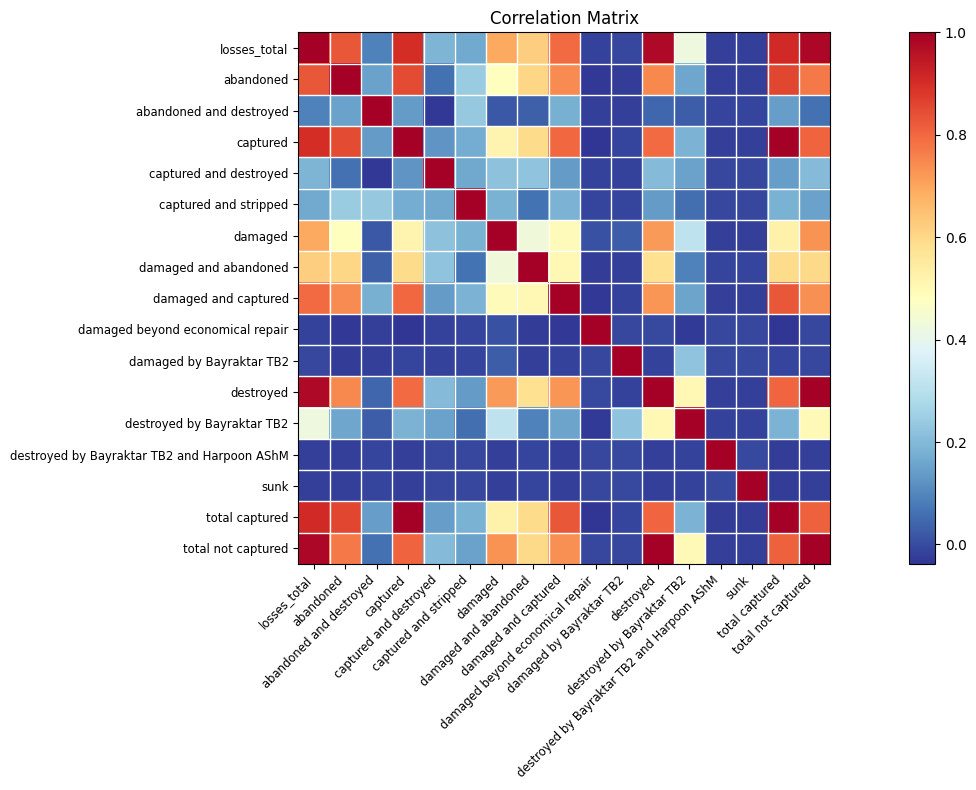

In [5]:
# Luego un heatmap de corr
plt.rc("figure", figsize=(16,8)) # para aumentar su tamaño

corr = df_tech.loc[:, 'losses_total':].corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


In [6]:
# Vemos una correlación curiosa entre equipamiento abandonado (que técnicamente cuenta como destruido) y el equipamiento capturado
# Lo comprobamos con un ztest. Vemos que no, que la correlación es casual, pues el valor de capturas es demasiado mayor:

_ , p = sm.stats.ztest(df_tech['abandoned'], df_tech['total captured'], alternative = "two-sided")
print(p) # p valor inferior a 0.05, luego no hay igualdad entre equipamiento capturado y equipamiento abandonado

# Como el p valor para los dos lados es inferior a 0.05, podemos hacer:
_ , p1 = sm.stats.ztest(df_tech['abandoned'], df_tech['total captured'], alternative = "larger")
print(p1) # el p valor es superior a 0.05, luego el valor del equipamiento capturado es mayor al equipamiento abandonado


1.0205959772589763e-08
0.9999999948970201


In [7]:
# Fuera de eso, vemos dos correlaciones que tienen bastante sentido: las capturas convencionales son representativos del total de capturas, y las destrucciones, del total de no capturas
# En efecto, en ambos casos vemos que la correlación es cierta
# Útil si tuvieramos que sacar una muestra, no tan útil cuando disponemos de los totales. Útil ya que nos permite, en adelante,
# referirnos en los gráficos simplemente a "destruidos vs capturados" sin alejarnos mucho de la realidad

_ , p = sm.stats.ztest(df_tech['captured'], df_tech['total captured'], alternative = "two-sided")
print(p)

_ , p = sm.stats.ztest(df_tech['destroyed'], df_tech['total not captured'], alternative = "two-sided")
print(p)


0.7127442868124878
0.5885803729694092


In [8]:
# Vamos a por la hipótesis: 

df_tech_soviet = df_tech[df_tech['manufacturer'] == 'the Soviet Union']

df_tech_not_soviet = df_tech[df_tech['manufacturer'] != 'the Soviet Union']

df_tech_not_soviet_totals = df_tech_not_soviet.groupby('equipment').sum(numeric_only=True)[['total captured', 'total not captured']]

df_tech_soviet_totals = df_tech_soviet.groupby('equipment').sum(numeric_only=True)[['total captured', 'total not captured']]

df_tech_soviet_totals


,total captured,total not captured
equipment,,
Aircraft,0.0,30.0
Anti-Aircraft Guns,11.0,3.0
Armoured Fighting Vehicles,200.0,254.0
Armoured Personnel Carriers,76.0,85.0
Artillery Support Vehicles And Equipment,27.0,27.0
Command Posts And Communications Stations,7.0,14.0
Engineering Vehicles And Equipment,66.0,65.0
Heavy Mortars,10.0,5.0
Helicopters,0.0,3.0


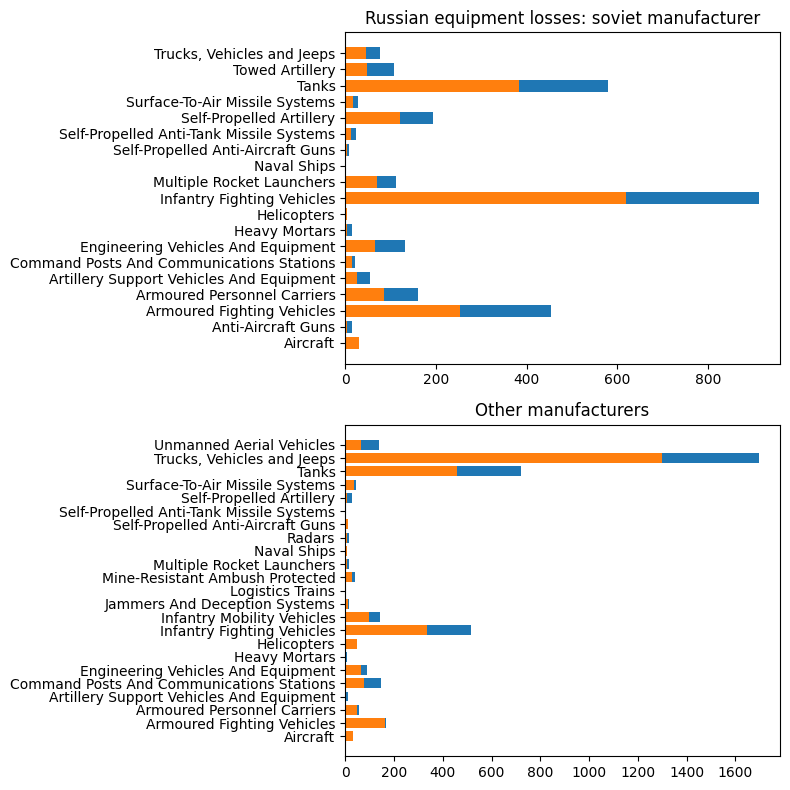

In [9]:
# Vemos que los vehículos de infantería, tanto con capacidad defensiva -infantry fighting vehicles, en los soviéticos- como los inofensivos -trucks, vehicles and jeeps, en los no soviéticos-)
# son mayoría en cuanto a destruidos y capturados

plt.rc("figure", figsize=(8,8)) 

fig, ax = plt.subplots(2)
for index, df in enumerate([df_tech_soviet_totals, df_tech_not_soviet_totals]):
    labels = df.index
    width = 0.75
    captured = df['total captured']
    not_captured = df['total not captured']
    ax[index].set_title('Russian equipment losses: soviet manufacturer')
    ax[index].barh(labels, captured + not_captured, width)
    ax[index].barh(labels, not_captured, width)
plt.title('Other manufacturers')
plt.tight_layout()
plt.show()


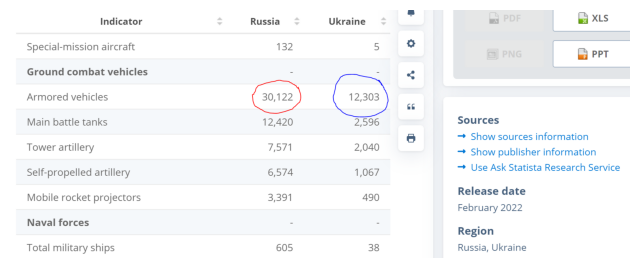

In [24]:
# Elloo concuerda con los datos obtenidos en las otras hipótesis. No tenemos el total de tropas desplegadas, así que no podemos decir que se destruyan con más o menos facilidad
# ni que sean mayoría (o no) en el ejército. Sí que podemos decir que, por norma general, el grueso del equipamiento de un ejército moderno lo forman los vehículos terrestres
# y el grueso de los los vehículos de un ejército moderno lo forman, en efecto, automóbiles blindados y tanques
# prueba para el caso de Ucrania y rusia: https://www.statista.com/statistics/1296573/russia-ukraine-military-comparison/
# Ojo que esto son las capacidades militares de ambas naciones; probablemente no sabremos el número de tropas desplegadas real hasta que pase la guerra

img = mpimg.imread('../data/vehicles_amount.PNG') # ajustar enlace para notebook EDA
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


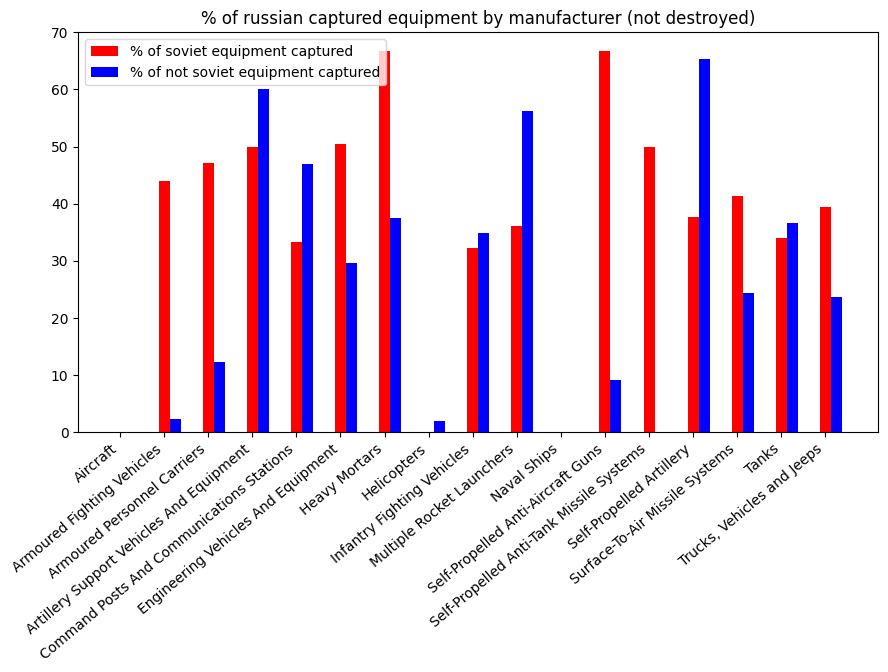

In [28]:
# Ahora hay que comprobar, para cada pieza de equipamiento, si es cierto que la proporción en pérdidas es superior a la de capturas
# para el equipamiento soviético respecto al equipamiento no soviético
# Lo haremos creando una tercera columna que será la proporción de capturas respecto al total
# Lo haremos en forma de función para repetir luego el proceso con el dataframe ucraniano

def equalize_indexes(df_a, df_b):
    for index in df_a.index:
        if index not in  df_b.index:
            df_a.drop(index=index, inplace=True)


def show_equipment_by_manufacturer(df_soviet, df_not_soviet, side):
    for df in [df_soviet, df_not_soviet]:
        df['captured P'] = (df['total captured'] / (df['total captured'] + df['total not captured'])) * 100

    equalize_indexes(df_soviet, df_not_soviet)
    equalize_indexes(df_not_soviet, df_soviet)

    plt.rc("figure", figsize=(8,4)) 
    X = np.arange(len(df_soviet['captured P']))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, list(df_soviet['captured P']), color = 'r', width = 0.25)
    ax.bar(X + 0.25, list(df_not_soviet['captured P']), color = 'b', width = 0.25)
    plt.xticks([i for i, val in enumerate(df_not_soviet.index)], df_soviet.index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.legend(labels=['% of soviet equipment captured', '% of not soviet equipment captured'])
    plt.title(f'% of {side} captured equipment by manufacturer (not destroyed)')
    plt.show()


show_equipment_by_manufacturer(df_tech_soviet_totals, df_tech_not_soviet_totals, 'russian')


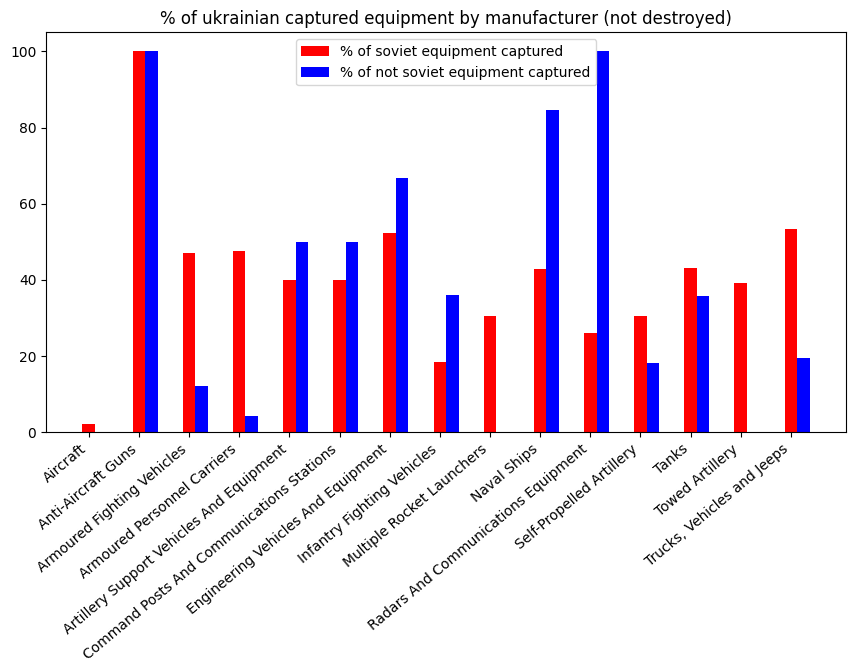

In [29]:
# Veamos ahora para el caso ucraniano

df_uk_tech_soviet = df_uk_tech[df_uk_tech['manufacturer'] == 'the Soviet Union']
df_uk_tech_not_soviet = df_uk_tech[df_uk_tech['manufacturer'] != 'the Soviet Union']
df_uk_tech_not_soviet_totals =df_uk_tech_not_soviet.groupby('equipment').sum(numeric_only=True)[['total captured', 'total not captured']]
df_uk_tech_soviet_totals = df_uk_tech_soviet.groupby('equipment').sum(numeric_only=True)[['total captured', 'total not captured']]
df_uk_tech_soviet_totals

show_equipment_by_manufacturer(df_uk_tech_soviet_totals, df_uk_tech_not_soviet_totals, 'ukrainian')

In [12]:
# Menores de 30 todos: ttest

In [13]:
# Iguales (p value > 0.05)
stats.ttest_ind(a= df_tech_soviet_totals['captured P'],
                b= df_tech_not_soviet_totals['captured P'],
                equal_var=False)

Ttest_indResult(statistic=1.5064839191231234, pvalue=0.14184463013710832)

In [14]:
# Iguales (p value > 0.05)
stats.ttest_ind(a= df_uk_tech_soviet_totals['captured P'],
                b= df_uk_tech_not_soviet_totals['captured P'],
                equal_var=False)

Ttest_indResult(statistic=0.2238560158400564, pvalue=0.8248622121041264)

In [15]:
# Iguales (p value > 0.05)
captured_p = list(df_tech_soviet_totals['captured P']) + list(df_tech_not_soviet_totals['captured P'])
uk_captured_p = list(df_uk_tech_soviet_totals['captured P']) + list(df_uk_tech_not_soviet_totals['captured P'])

stats.ttest_ind(a= captured_p,
                b= uk_captured_p,
                equal_var=False)
        

Ttest_indResult(statistic=-1.2673210859752118, pvalue=0.2105224284271538)

In [16]:
# En conclusión:
# 1) Para los rusos la tendencia de las capturas viene dada por las capturas convencionales, no por los casos particulares.
# Del mismo modo, la tendencia en cuanto a las pérdidas la marcan las destrucciones, no los abandonos, daños etc.
# 2) La mayoría de pérdidas del bando ruso son vehículos de transporte de infantería armados (soviéticos) y vehículos de transporte no armados (no soviéticos)
# Entiendo que ambas categorías se consideran APC para el caso de la hipótesis previa, lo cual la verifica
# 3) Los ttest nos demuestran que no hay una diferencia palpable entre el número de capturas para el equipamiento soviético y no soviético.
# Tampoco lo hay en las capturas totales de rusia respecto a las de ucrania.
# Por tanto, deducimos que el equipamiento soviético no pierde demasiado fuelle frente al enemigo en comparación con el moderno